# Plotting in Python
An introduction to Python plotting by [Dr. Yi-Xin Liu](http://www.yxliu.group) at Fudan University (lyx@fudan.edu.cn)<br>
This is a part of the course: *Road to Scientific Research: Powerful Computer Applications* (XDSY118019.01)  
Lecture date: 2024.10.24

source: https://github.com/liuyxpp/XDSY118019/blob/main/04_python_plotting.ipynb

This tutorial recompiles several `matplotlib` [official tutorials](https://matplotlib.org/stable/tutorials/index.html) into one coherent document. 

## Matplotlib PyPlot

`matplotlib.pyplot` is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In `matplotlib.pyplot` various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that "axes" here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).

Note that there are essentially two ways to use Matplotlib:

- Explicit API: explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").
- Implicit PyPlot: rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.

The implicit pyplot API is generally less verbose but also not as flexible as the explicit API. It is sometimes also possible to mix the two.

In this tutorial, we will follow the implicit pyplot way in most of the time.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Components of a Figure

The components of a typcial Matplotlib Figure are shown below:

![components of a matplotlib figure](anatomy.webp)

## Plot Types

Matplotlib supports almost all common plot types for 2D graphics, such as line plots, scatter plots, bar plots, pie plots, histograms, etc. A list of available plot types can be viewed [here](https://matplotlib.org/stable/plot_types/index.html). In this tutorial (and for most publication figures), we will focus on line plots and scatter plots.

### Line plots

A line plot can be drew using `plot` function.

In [2]:
# We first a define a function curve to be plotted.
def f(x):
    return np.sinc(x/np.pi)

def g(x, mu=0, sig=3):
    # ignore the normalization factor 1./(np.sqrt(2.*np.pi)*sig) to have g(0) = 1.0
    # be consistent with f(x)
    return np.exp(-np.power((x - mu)/sig, 2.)/2)

def h(x):
    y = (np.tanh((x-1.5*np.pi)/3) + 1) / 2
    return y / np.max(y)

In [3]:
# Generate some data to plot
N = 100
# x = np.linspace(0, 4*np.pi, N)
x = np.sort(np.random.uniform(0, 4*np.pi, N))
# x = np.random.uniform(0, 4*np.pi, N)
y = f(x)

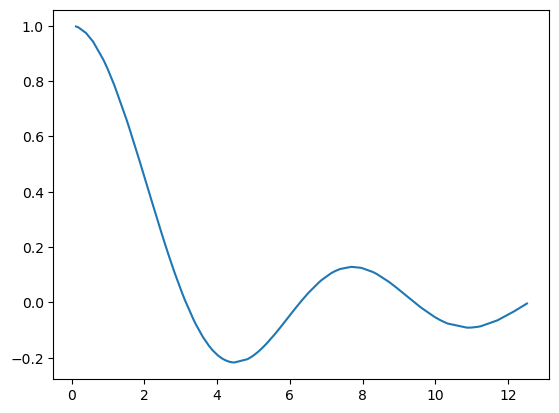

In [4]:
plt.plot(x, y)

Markers can be added to help visualize the actual locations of data.

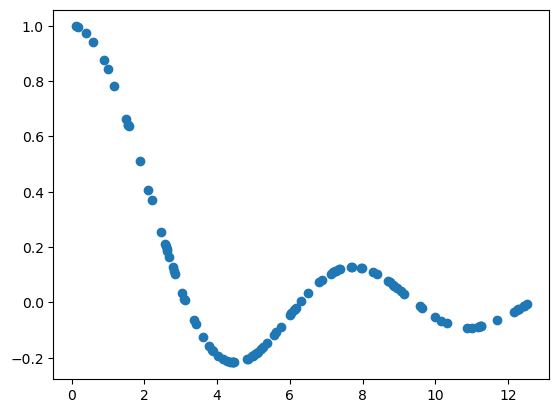

In [5]:
plt.plot(x, y, 'o')

### Scatter plots

Sometimes each data points are better to be plotted as inpendent markers. Matplotlib function `scatter` can do it too.

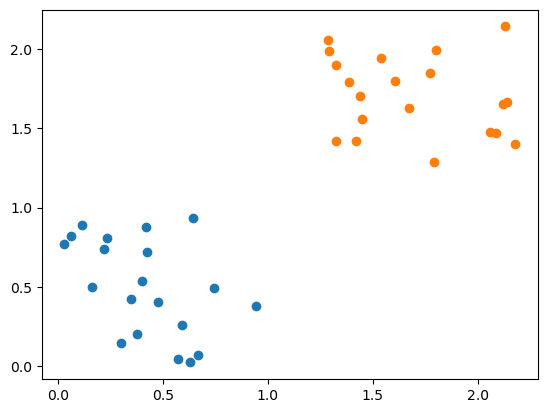

In [6]:
# the array for x coordinates is not necessary sorted.
plt.scatter(np.random.random(20), np.random.random(20))
plt.scatter(np.random.random(20)+1.2, np.random.random(20)+1.2)

## Styles

In `matplotlib`, the looking of a plot can be customized via several ways:

- Use keyword arguments:

```python
plt.plot(x, y, linewidth=3.0)
```

- Use the setter methods of a `Line2D` or other Artist instance. `plot` returns a list of `Line2D` objects; e.g., `line1, line2 = plot(x1, y1, x2, y2)`. In the code below we will suppose that we have only one line so that the list returned is of length 1. We use tuple unpacking with line, to get the first element of that list:

```python
line, = plt.plot(x, y)
line.set_linewidth(3.0)
```

- Use `setp`. The example below uses a MATLAB-style function to set multiple properties on a list of lines. `setp` works transparently with a list of objects or a single object. You can either use Python keyword arguments or MATLAB-style string/value pairs:

```python
lines = plt.plot(x1, y1, x2, y2)
# use keyword arguments
plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)
```

### Lines

Lines have many attributes that you can set: linewidth, dash style, antialiased, etc. To get a list of settable line properties, call the `setp` function with a line or lines as argument

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `~matplotlib.figure.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker st

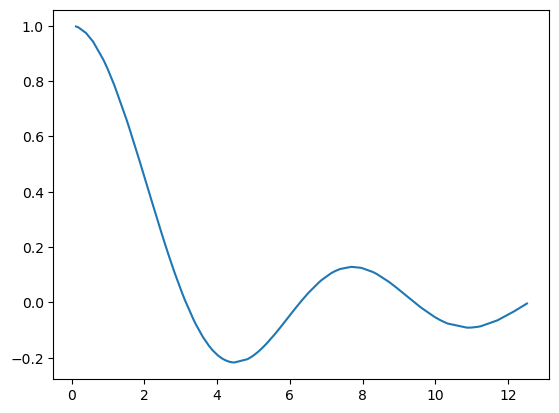

In [7]:
line, = plt.plot(x, y)
plt.setp(line)

[None]

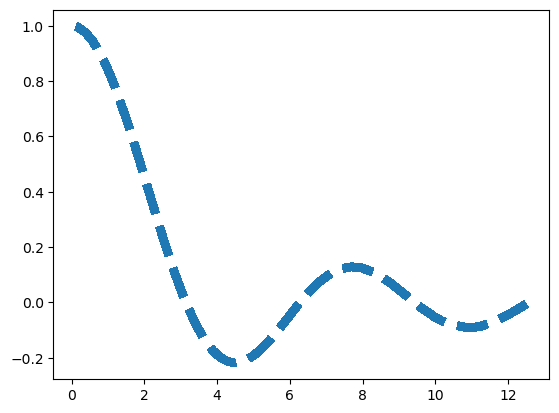

In [8]:
line, = plt.plot(x, y, lw=6.0)  # change linewidth 3.0.
line.set_linestyle('--')  # change line style to dash line.
plt.setp(line, antialiased=False)  # # turn off antialiasing

When multiple lines are plotted in the same figure, line colors are cycled from a predefined list of colors.

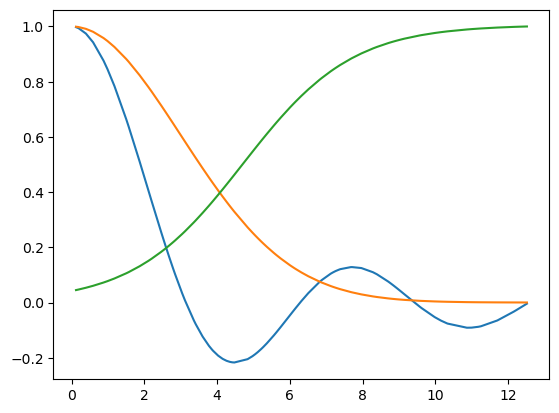

In [9]:
lines = plt.plot(x, f(x), x, g(x), x, h(x))

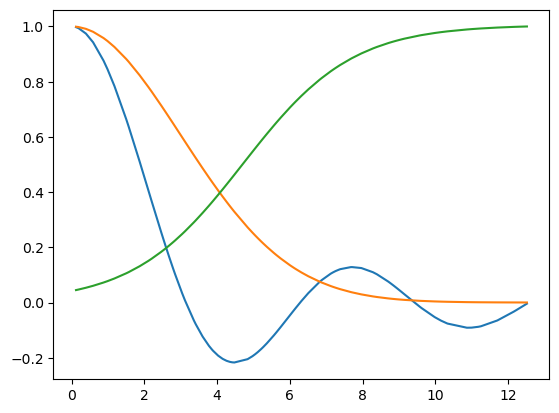

In [10]:
plt.plot(x, f(x))
plt.plot(x, g(x))
plt.plot(x, h(x))

### Markers

Marker size depends on the method being used. `plot` specifies markersize in points, and is generally the "diameter" or width of the marker. `scatter` specifies markersize as approximately proportional to the visual area of the marker. There is an array of markerstyles available as string codes (see [markers](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)), or users can define their own [MarkerStyle](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle) (see [Marker reference](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html)).

- Markers in `plot`

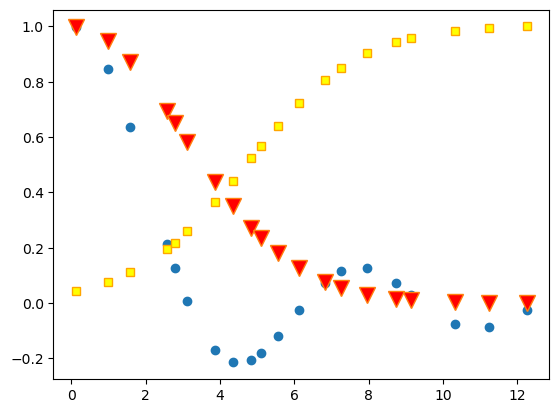

In [11]:
xs = x[0:len(x):5]
plt.plot(xs, f(xs), 'o')
plt.plot(xs, g(xs), 'v', ms=12, mfc='red')  # ms=markersize, mfc=makerfacecolor
plt.plot(xs, h(xs), 's', mew=1, mfc='yellow', mec='orange')  # mew=markeredgewidth, mec=markeredgecolor

- Markers in `scatter`

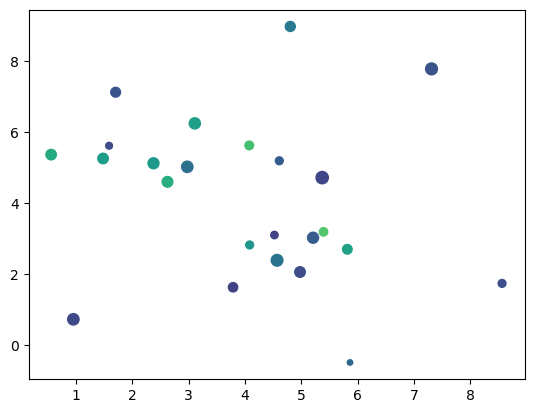

In [12]:
# make the data
xm = 4 + np.random.normal(0, 2, 24)
ym = 4 + np.random.normal(0, 2, len(xm))
# size and color:
sizes = np.random.uniform(15, 80, len(xm))
colors = np.random.uniform(15, 80, len(xm))
# plot
plt.scatter(xm, ym, s=sizes, c=colors, vmin=0, vmax=100)

### Axes

Each Axes has two (or three) Axis objects representing the x- and y-axis. These control the scale of the Axis, the tick locators and the tick formatters. Additional Axes can be attached to display further Axis objects.

- Axis line width

[None, None, None, None, None, None, None, None]

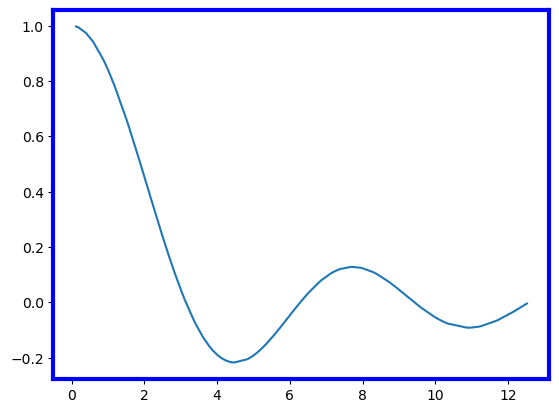

In [13]:
# fig, ax = plt.subplots()
line, = plt.plot(x, y)
plt.setp(line.axes.spines.values(), linewidth=3, color='b')

- Ticks

Placing ticks and ticklabels is a very tricky aspect of making a figure. Matplotlib does its best to accomplish the task automatically, but it also offers a very flexible framework for determining the choices for tick locations, and how they are labelled. A detailed tutorial can be found [here](https://matplotlib.org/stable/tutorials/text/text_intro.html#ticks-and-ticklabels) and [here](https://matplotlib.org/stable/gallery/ticks/index.html) and [here](https://e2eml.school/matplotlib_ticks.html).

Here we use `plt.tick_params` to control some most important properties of ticks. `tick_params` method for `Axes` object is an alternative way (the explicit API way) to control ticks.

In [14]:
plt.tick_params?

Signature: plt.tick_params(axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'
Docstring:
Change the appearance of ticks, tick labels, and gridlines.

Tick properties that are not explicitly set using the keyword
arguments remain unchanged unless *reset* is True. For the current
style settings, see `.Axis.get_tick_params`.

Parameters
----------
axis : {'x', 'y', 'both'}, default: 'both'
    The axis to which the parameters are applied.
which : {'major', 'minor', 'both'}, default: 'major'
    The group of ticks to which the parameters are applied.
reset : bool, default: False
    Whether to reset the ticks to defaults before updating them.

Other Parameters
----------------
direction : {'in', 'out', 'inout'}
    Puts ticks inside the Axes, outside the Axes, or both.
length : float
    Tick length in points.
width : float
    Tick width in points.
color : color
    Tick color.
pad : float
    Distance in points between tick and label.
labelsize : float or str
    Tick label 

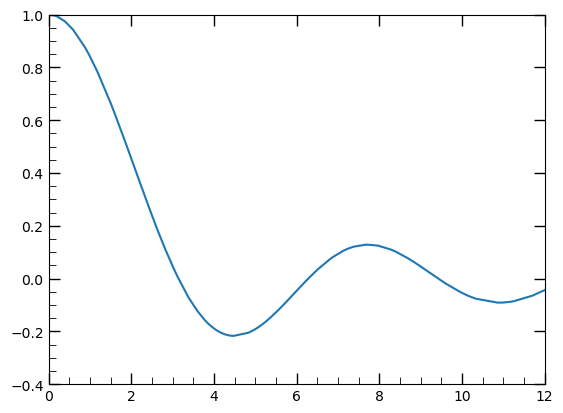

In [15]:
plt.plot(x, y)
plt.xlim(0, 12)
plt.ylim(-0.4, 1.0)
# Ticks and tick labels visibility
plt.tick_params(left=True, right=True, top=True, bottom=True)
plt.tick_params(labelleft=True, labelright=False, labeltop=False, labelbottom=True)
# major ticks
plt.minorticks_on()
plt.tick_params(axis='x', direction='in', length=8, width=1)
plt.tick_params(axis='y', direction='in', length=8, width=1)
# minor ticks
plt.tick_params(axis='both', which='minor', direction='in', length=5)

### Colors

Matplotlib has support for visualizing information with a wide array of colors and colormaps. Check the color tutorial by `matplotlib` [here](https://matplotlib.org/stable/tutorials/colors/index.html).

Matplotlib recognizes various formats to specify a color.

- RGB or RGBA tuples, in the interval [0, 1]. Examples: `(0.1, 0.2, 0.5)`, `(0.1, 0.2, 0.5, 0.3)`.
- RGB or RGBA hex string. Examples: `'#0f0f0f'`, `'#0f0f0f80'`.
- RGB shorthand hex string with duplicated characters. Examples: `'#fb1'` as `'#ffbb11'`.
- Grayscale values in string representation within [0, 1]. Examples: `'0'` as black, `'1'` as white, `'0.8'` as light gray.
- Basic colors as single charactar. Full list: `'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'`.
- X11/CSS4 color name with no spaces. Examples: `AaquaMarine', 'RoyalBlue'`. See full list [here](https://www.w3schools.com/cssref/css_colors.asp). 
- Colors from [xkcd color survey](https://xkcd.com/color/rgb/) with `'xkcd:'` prefix. Examples: `'xkcd:sky blue', 'xkcd:eggshell'`.
- Tableau colors from `T10` palette. Full list: `'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'`.
- "CN" color spec where 'C' precedes a number acting as an index into the current default property cycle. Examples: `'C0', 'C1'`. **This one is particularly useful!**

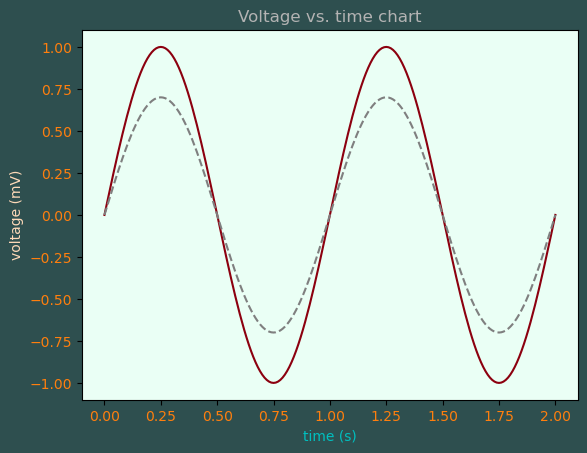

In [16]:
# Codes from https://matplotlib.org/stable/gallery/color/color_demo.html
t = np.linspace(0.0, 2.0, 201)
s = np.sin(2 * np.pi * t)

# 1) RGB tuple:
fig, ax = plt.subplots(facecolor=(.18, .31, .31))
# 2) hex string:
ax.set_facecolor('#eafff5')
# 3) gray level string:
ax.set_title('Voltage vs. time chart', color='0.7')
# 4) single letter color string
ax.set_xlabel('time (s)', color='c')
# 5) a named color:
ax.set_ylabel('voltage (mV)', color='peachpuff')
# 6) a named xkcd color:
ax.plot(t, s, 'xkcd:crimson')
# 7) Cn notation:
ax.plot(t, .7*s, color='C7', linestyle='--')
# 8) tab notation:
ax.tick_params(labelcolor='tab:orange')

### Style cycler

Using `cycler` package to cycling through multiple `matplotlib` properties, including colors, line styles, etc.

In [17]:
from cycler import cycler

In [18]:
cc = cycler(color=list('rgb'))
for c in cc:
    print(c)

{'color': 'r'}
{'color': 'g'}
{'color': 'b'}


- Cyclers can be added

In [19]:
cc = (cycler(color=list('rgb')) +
      cycler(linestyle=['-', '--', '-.']))
for c in cc:
    print(c)

{'color': 'r', 'linestyle': '-'}
{'color': 'g', 'linestyle': '--'}
{'color': 'b', 'linestyle': '-.'}


- Cyclers can be multiplied, like a Kronecker product

In [20]:
cc = (cycler(color=list('rgb')) *
      cycler(linestyle=['-', '--', '-.']))
for c in cc:
    print(c)

{'color': 'r', 'linestyle': '-'}
{'color': 'r', 'linestyle': '--'}
{'color': 'r', 'linestyle': '-.'}
{'color': 'g', 'linestyle': '-'}
{'color': 'g', 'linestyle': '--'}
{'color': 'g', 'linestyle': '-.'}
{'color': 'b', 'linestyle': '-'}
{'color': 'b', 'linestyle': '--'}
{'color': 'b', 'linestyle': '-.'}


- Apply to the actual plotting

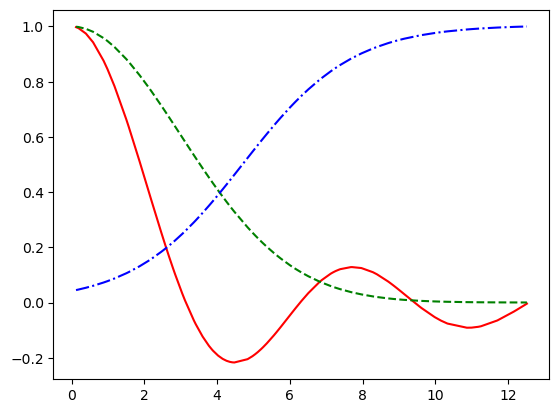

In [21]:
cc = (cycler(color=list('rgb')) +
      cycler(linestyle=['-', '--', '-.']))
cciter = iter(cc)  # create an iterator based on the cycler.

plt.plot(x, f(x), **next(cciter))
plt.plot(x, g(x), **next(cciter))
plt.plot(x, h(x), **next(cciter))

## Labels and Texts

Matplotlib has extensive text support, including support for mathematical expressions, truetype support for raster and vector outputs, newline separated text with arbitrary rotations, and Unicode support.

The user has a great deal of control over text properties (font size, font weight, text location and color, etc.) with sensible defaults set in the [rc file](https://matplotlib.org/stable/tutorials/introductory/customizing.html). And significantly, for those interested in mathematical or scientific figures, Matplotlib implements a large number of TeX math symbols and commands, supporting [mathematical expressions](https://matplotlib.org/stable/tutorials/text/mathtext.html) anywhere in your figure.

A more detailed tutorial for texts by `matplotlib` can be found [here](https://matplotlib.org/stable/tutorials/text/text_intro.html).

### Titles and labels

- Implicit pyplot way: `plt.xlabel`, `plt.ylabel`, `plt.title`.
- Explicit API way: `set_xlabel`, `set_ylabel`, `set_title`.

Text(0.5, 1.0, 'Signal Intensity')

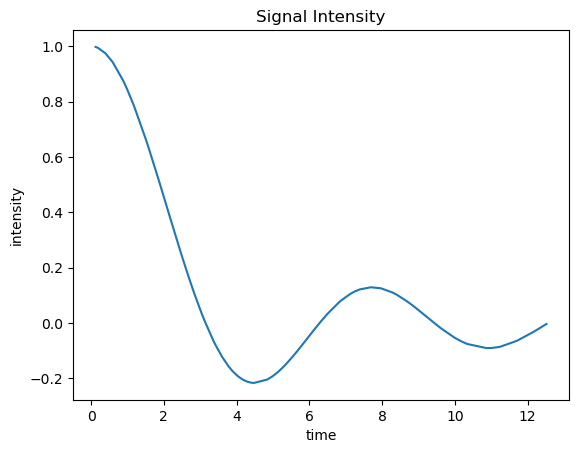

In [22]:
plt.plot(x, y)
plt.xlabel("time")
plt.ylabel("intensity")
plt.title("Signal Intensity")

### Texts and annotations

- Texts are added by `plt.text` function or `text` method for the Axis object.
- Annotations are added by `plt.annotate` function or `annotate` method for the Axis object. See [this tutorial](https://matplotlib.org/stable/tutorials/text/annotations.html) for more details.

Text(9, 0.5, 'maximum')

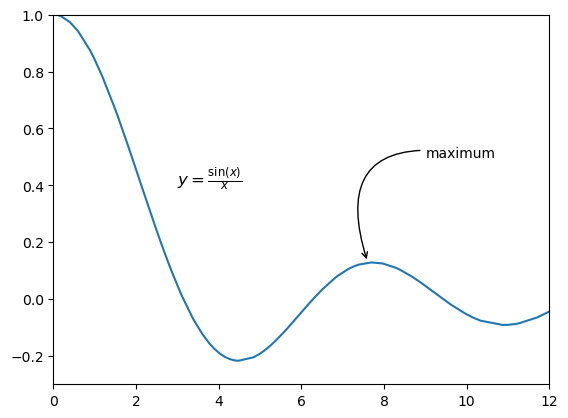

In [23]:
plt.plot(x, y)
plt.xlim(0, 12)
plt.ylim(-0.3, 1.0)
plt.text(3, 0.4, r'$y = \frac{\sin(x)}{x}$', fontsize=12)
plt.annotate("maximum", xy=(7.6, 0.13), xytext=(9, 0.5),
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3, rad=0.8"))

### Mathematical expressions

You can use a subset of TeX markup in any Matplotlib text string by placing it inside a pair of dollar signs ($).

Any text element can use math text. You should use raw strings (precede the quotes with an `'r'`), and surround the math text with dollar signs ($), as in TeX. Regular text and mathtext can be interleaved within the same string. Mathtext can use DejaVu Sans (default), DejaVu Serif, the Computer Modern fonts (from (La)TeX), STIX fonts (which are designed to blend well with Times), or a Unicode font that you provide. The mathtext font can be selected via `rcParams["mathtext.fontset"]` (default: `'dejavusans'`) (see [Customizing Matplotlib with style sheets and rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html))

A more detailed tutorial can be found [here](https://matplotlib.org/stable/tutorials/text/mathtext.html).

Text(0.5, 1.0, 'Plain text with math $(\\sqrt{x}+x^2)\\frac{\\sin(x)}{x}$')

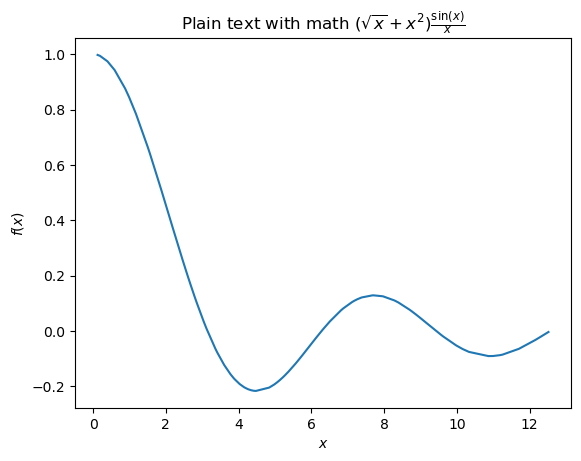

In [24]:
plt.plot(x, y)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.title(r"Plain text with math $(\sqrt{x}+x^2)\frac{\sin(x)}{x}$")

### Fonts

The font properties can be set with keyword arguments or using `matplotlib.font_manager.FontProperties` or using `rcParam`.

Available keyword arguments for font properties:

- `family`
- `fontsize`
- `fontname`
- `fontstyle`
- `fontweight`
- `fontproperties`

A more detailed tutorial can be found [here](https://matplotlib.org/stable/tutorials/text/text_props.html).

In [25]:
from matplotlib.font_manager import FontProperties

Text(0.5, 0, 'time [s]')

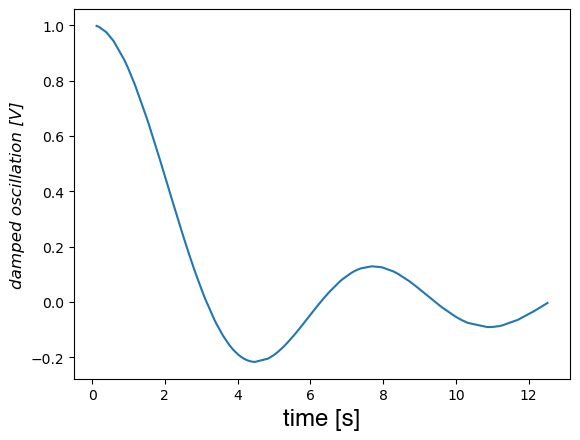

In [26]:
plt.plot(x, y)
plt.ylabel("damped oscillation [V]", fontsize='large', fontstyle='italic')

font = FontProperties()
font.set_family('sans-serif')
font.set_name('Helvetica')
font.set_weight('bold')
font.set_size('xx-large')
plt.xlabel("time [s]", fontproperties=font)

## Legends

Legends are most useful for multi-line plots.

- Implicit pyplot way: `plt.legend`.
- Explicit API way: `ax.legend`.

See a detailed tutorial for legend [here](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html).

In [27]:
?plt.legend

Signature: plt.legend(*args, **kwargs) -> 'Legend'
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

.. note::
    Specific artists can be excluded from the automatic legend element
    selection by using a label starting with an underscore, "_".
    A string starting with an underscore is the default label for a

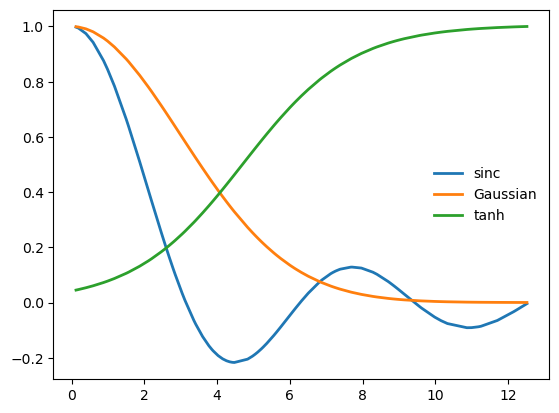

In [28]:
plt.plot(x, f(x), label="sinc", lw=2)
plt.plot(x, g(x), label="Gaussian", lw=2)
plt.plot(x, h(x), label="tanh", lw=2)
plt.legend(loc='center right', frameon=False)  # `loc='best'`, `frameon=False` are defaults.

## Layouts

In Matplotlib, a figure can have multiple `Axes`. The arrangement of these axes are called a layout. `plt.subplots` and `plt.subplot` are used to create multiple axes. One can achieve more complex layouts, with Axes objects spanning columns or rows, using `subplot_mosaic`.

Matplotlib has the concept of the current figure and the current axes. All plotting functions apply to the current axes. The function `gca` returns the current axes (a `matplotlib.axes.Axes` instance), and `gcf` returns the current figure (a `matplotlib.figure.Figure` instance). Normally, you don't have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

Matplotlib has quite sophisticated tools for arranging Axes: See [Arranging multiple Axes in a Figure and Complex](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html) and [semantic figure composition](https://matplotlib.org/stable/tutorials/provisional/mosaic.html).

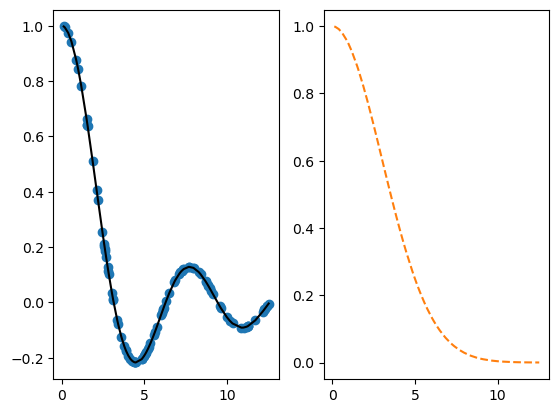

In [29]:
plt.figure()
plt.subplot(121)  # 211 means: 2 - two rows, 1 - one column, 1 - location at first row, first column
plt.plot(x, f(x), 'o', x, f(x), 'k')

plt.subplot(122)  # 212 means: # 2 - two rows, 1 - one column, 1 - location at second row, first column
plt.plot(x, g(x), 'C1--')

## Create A Publication Quality Figure

Creating a publication-quality plot is not an easy job. One needs to consider a dozen of factors:

- The figure size should be set explicitly to match journal specific value. For exmaple, journals published by American Chemical Society (ACS) allows a maximum 3.25-inch width figure for single-column and a maximum 7-inch width figure for double-column.
- The font family should be customized. Most of the time, “Times New Roman” is a safe choice. You should consult the journal author guide for more information.
- The font size also needs to be set properly.
- The linewdith of axis, axis ticks, line arts, the format of legend, the colors are all important factors affects the final looking of a plot.
- The file format of a figure should be chosen carefully. For most publishers, EPS is a good choice for line arts and other simple 2D arts, such as histograms, power spectra, bar charts, errorcharts, scatterplots.

The [`mpltex` package](https://github.com/liuyxpp/mpltex) can do all the above customizations for specific journal publishers (ACS, APS, RSC). For more details, visit [the tutorial](http://www.yxliu.group/2014/09/mpltex) and study [the source code](https://github.com/liuyxpp/mpltex).


Note: you may need to install the package `mpltex` first.

In [30]:
import mpltex

Failed to find a Ghostscript installation.  Distillation step skipped.


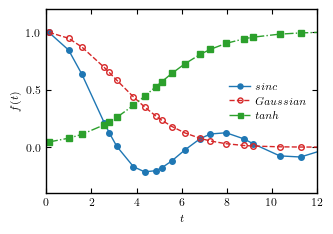

In [31]:
@mpltex.acs_decorator
def my_plot(t):
    fig, ax = plt.subplots(1)
    linestyles = mpltex.linestyle_generator()
    ax.plot(t, f(t), label='$sinc$', **next(linestyles))
    ax.plot(t, g(t), label='$Gaussian$', **next(linestyles))
    ax.plot(t, h(t), label='$tanh$', **next(linestyles))

    ax.set_xlabel('$t$')
    ax.set_ylabel('$f(t)$')
    ax.legend(loc='best', ncol=1)
    ax.set_xlim(0, 12)
    ax.set_ylim(-0.4, 1.2)
    fig.tight_layout(pad=0.1)
    # Uncomment following line to save the resulted figure as an EPS image file.
    fig.savefig('mpltex-acs')

my_plot(x[0:len(x):5])